In [15]:
import statsmodels.api as sm
import numpy as np
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from catboost import CatBoostRegressor, CatBoostClassifier
from scipy.stats import logistic

MC_N = 50
MC_θ = np.zeros((MC_N,4))
MC_y = np.zeros((MC_N,4))
MC_t = np.zeros((MC_N,4))

for j in range(MC_N):
    import numpy as np
    N = 5000
    σ_t = 1
    σ_y = 1
    σ_x = 1
    θ = 0.5 # TRUE ATE
    α_t = 0.5
    α_y = 0.5
    x = np.random.normal(0,σ_x,N)
    e_t = np.random.normal(0,σ_t,N)
    e_y = np.random.normal(0,σ_y,N)
    t = np.random.binomial(1,logistic.cdf(α_t*x))
    y = np.power(α_y * x, 2) + θ * t + e_y
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)
    t = t.reshape(-1, 1)
    data = np.c_[y,t,x]
    print(data[0:5])
    
    # OLS - Full Estimation
    model_OLS = sm.OLS(y, np.c_[t,x])
    res = model_OLS.fit()
    θ_OLS = res.params[0]
    # OLS First Stage: Y
    model_OLS = sm.OLS(y, np.c_[x])
    res_y = model_OLS.fit()
    θ_OLS_y = res_y.params[0]    
    # Logistic First Stage
    clf = LogisticRegression(random_state=0).fit(x, t)
    
    # DML Lasso
    model_Lasso = LinearDML(discrete_treatment=True, random_state=1)
    model_Lasso.fit(y, t, X=None,W=x)
    θ_DMLL = model_Lasso.intercept_

    # DML RF
    model_XGB = LinearDML(discrete_treatment=True, 
                          model_y = CatBoostRegressor(learning_rate=0.01, verbose = False), 
                          model_t = CatBoostClassifier(learning_rate=0.01, verbose = False))
    model_XGB.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_XGB.intercept_
    
    # DML NN - First Stage
    model_NN = LinearDML(discrete_treatment=True, 
                         model_y = MLPRegressor(hidden_layer_sizes=(20,)), 
                         model_t = MLPClassifier(hidden_layer_sizes=(20,)))
    model_NN.fit(y.ravel(), t.ravel(), X=None,W=x)
    θ_DMLRF = model_NN.intercept_


    MC_θ[j] = [θ_OLS, model_Lasso.intercept_, model_XGB.intercept_, model_NN.intercept_]
    MC_y[j] = [res_y.rsquared, np.mean(model_Lasso.nuisance_scores_y), np.mean(model_XGB.nuisance_scores_y),np.mean(model_NN.nuisance_scores_y)]
    MC_t[j] = [clf.score(x,t), np.mean(model_Lasso.nuisance_scores_t), np.mean(model_XGB.nuisance_scores_t),np.mean(model_NN.nuisance_scores_t)]
    
    

[[-0.08882585  0.          0.47879616]
 [ 1.4285711   1.          0.46880448]
 [-1.27308257  0.         -0.49318325]
 [ 1.19494368  1.          0.51486027]
 [ 1.2885371   0.         -2.00991515]]


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.52934244  0.         -1.77547902]
 [ 0.82549056  0.         -1.27832387]
 [-0.76520271  1.          0.85633372]
 [ 0.44998307  0.          0.48479845]
 [-0.54249801  0.          0.05622389]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.52865467  0.         -2.32043315]
 [-1.16741072  0.         -0.24034586]
 [-0.63837082  1.          0.54069369]
 [ 1.22924662  1.          0.72106336]
 [-0.52784896  0.          0.38792206]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.71796316  1.          2.84898038]
 [ 1.87191147  1.         -0.82905764]
 [ 1.9023828   1.          1.59077048]
 [ 0.16823014  1.          0.95625408]
 [ 1.58455991  1.          1.48400037]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.24849764  0.         -1.45115115]
 [ 0.31020105  0.         -0.12729199]
 [-0.59584905  0.          0.8073682 ]
 [ 2.14590942  1.          1.93702385]
 [ 2.11396313  0.          0.73635822]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.35156325  0.         -1.29493573]
 [ 0.04045692  0.         -0.6915719 ]
 [ 0.37366197  0.          1.24134997]
 [ 0.09639678  0.         -0.34465806]
 [ 1.53383533  1.         -0.27648587]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.73730066  1.          0.30228576]
 [-0.00578355  1.         -0.10751841]
 [ 0.55935579  0.          0.81239099]
 [-0.24642844  0.         -1.11142629]
 [-1.27549075  0.          0.86338962]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.53442168  1.         -0.66522985]
 [ 0.9942596   0.         -1.71005035]
 [-0.16750037  0.         -0.27156635]
 [ 1.96120943  1.          1.9817978 ]
 [ 0.55447479  1.          1.34685408]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.0862531   0.         -1.01304448]
 [ 0.99765254  1.          0.17747002]
 [ 1.19404396  0.         -2.02573622]
 [-0.18264332  1.          2.22505593]
 [ 0.77908788  1.          0.20263964]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.72167534  0.          0.31106   ]
 [-1.33866076  0.          0.07795988]
 [ 3.24095467  1.          2.24068394]
 [ 1.08251415  0.         -0.0904079 ]
 [ 0.33449828  0.         -1.80242151]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.42165261  1.         -0.79093747]
 [ 0.94954774  1.          0.3574447 ]
 [-0.29282434  0.         -1.97931948]
 [-1.05299246  0.         -1.02669815]
 [-0.13483379  1.          0.03979788]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.71438292  0.         -0.77147344]
 [-0.60115226  1.          1.28343946]
 [-0.51907458  0.         -1.2351237 ]
 [-0.41581642  0.         -0.38188888]
 [-0.59206412  0.         -0.46653823]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.09407284  1.          0.77679037]
 [-0.05958068  1.          1.26656409]
 [ 0.07566533  0.         -1.42760579]
 [-0.22738355  0.         -2.00029875]
 [ 0.72211526  1.         -1.26884999]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.66745937  1.          1.32236363]
 [ 0.36037403  1.          0.67014639]
 [ 0.66537035  1.          1.16238775]
 [ 1.39982117  0.         -0.0801377 ]
 [ 0.99837956  1.          1.63904098]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.22921662  0.          0.29186667]
 [-0.07305907  0.          0.12808728]
 [ 2.27651275  0.          0.58944912]
 [ 2.37168087  1.          0.96064251]
 [ 1.20043559  1.          0.95991187]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.72960555  0.          1.83559216]
 [ 1.4846279   0.          0.44425648]
 [ 0.03292624  0.         -0.69458685]
 [ 0.61461516  1.          1.26918981]
 [ 2.15395129  1.         -0.11561785]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 2.21874816  1.         -0.78407487]
 [ 0.65607984  1.          1.54368661]
 [-0.52408431  1.         -0.61317702]
 [ 2.07737592  1.         -0.47216954]
 [ 0.49342118  0.          0.26356407]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.5963752   0.         -0.1309777 ]
 [-0.70317925  1.         -0.63036554]
 [ 0.99181022  1.          1.51690164]
 [ 0.40024489  0.         -0.37008531]
 [-2.05935209  0.          0.1627709 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.04622194  0.          0.75981735]
 [-0.308038    1.         -0.1588356 ]
 [ 0.45827743  1.         -0.75891087]
 [-1.74463861  1.          0.16506776]
 [ 0.68979493  0.         -0.69456677]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.114752    0.         -1.8540972 ]
 [ 0.25812352  0.         -1.38701353]
 [-0.9444058   0.         -0.33561127]
 [-0.03608263  1.          1.78153089]
 [ 0.99479331  0.          0.69997235]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.56540561  0.          0.52753292]
 [-1.69385137  0.         -1.41676898]
 [ 1.91964899  1.         -0.18892666]
 [-1.38312324  0.         -1.6210873 ]
 [ 0.00739704  1.         -0.14357689]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.0936626   1.         -1.4689275 ]
 [ 2.00914015  1.         -1.51274911]
 [-1.34176862  0.         -0.129424  ]
 [ 0.31499605  0.         -0.1053114 ]
 [-0.77578701  0.          0.88681547]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.16099655  1.         -1.62146797]
 [ 1.46054232  1.         -0.90957232]
 [-1.1009262   1.          0.95300687]
 [ 2.79628001  1.         -2.62254704]
 [-0.96820464  0.         -1.10580047]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.17629641  0.          0.37023533]
 [-0.52592513  0.          0.45207356]
 [ 1.88964315  1.          0.2487916 ]
 [-0.4200568   0.         -0.3942975 ]
 [ 0.94888592  0.         -0.68860339]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.14273547  0.          0.24554061]
 [ 0.92095286  1.         -1.67232104]
 [-0.53186547  0.         -1.41095138]
 [ 1.35381324  0.          0.08142983]
 [ 0.27498943  1.         -0.53563738]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.22827808  0.          0.00967073]
 [-1.54147852  0.          0.63363853]
 [ 0.91565658  0.          0.7488594 ]
 [-0.26202295  0.          1.33290319]
 [ 0.45586717  1.          0.23112527]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.97083024  1.         -0.6996597 ]
 [-0.30480131  1.         -0.28048906]
 [ 1.07951951  0.          0.55781954]
 [ 0.28441106  1.          0.82450214]
 [ 0.48144884  0.         -1.17484413]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.56689283  0.         -0.22317556]
 [ 2.25519514  0.          0.51744748]
 [-0.04284995  0.          0.39205266]
 [-0.03537753  1.         -0.3660028 ]
 [ 0.22795714  0.         -0.17211872]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.74294078  0.         -1.49592755]
 [ 0.2146745   1.          0.60123232]
 [ 0.620846    0.          0.49502408]
 [ 2.58572563  1.          1.65974746]
 [ 1.71188266  0.          0.11192669]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.0466781   0.         -0.88784719]
 [ 1.1933401   0.         -0.67520024]
 [ 0.49570996  0.          0.5925449 ]
 [ 1.65550453  1.          0.39322319]
 [ 0.5801158   1.         -0.83726706]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.70771373  0.         -1.17398216]
 [-0.09771282  0.         -0.3701064 ]
 [-1.7969253   0.          0.14162672]
 [-0.56751904  0.          0.54349718]
 [ 0.59473526  1.         -0.78386498]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.19091236  0.          0.28304757]
 [-0.82611101  0.         -0.34815783]
 [ 1.26261156  0.          0.09377842]
 [ 2.45725912  0.         -1.63049907]
 [-0.37387185  0.         -0.33653132]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.3260603   0.         -0.79825991]
 [ 0.34776169  0.          1.38747283]
 [ 0.45076954  0.          0.55010592]
 [ 1.7414715   1.          1.89324429]
 [ 0.47691685  0.          0.05076481]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.46016276  0.         -2.10125222]
 [ 0.44451057  0.          0.2094853 ]
 [-0.86590939  0.          0.30212225]
 [ 0.56959684  0.         -0.57463715]
 [-0.29967403  1.         -0.27996513]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.66423081  1.         -0.10180657]
 [ 0.4365587   0.         -1.4218398 ]
 [ 1.09940673  1.          0.96103875]
 [ 2.46494823  1.          2.06600044]
 [ 0.53420506  0.          1.21828335]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.28707865  1.         -0.58723928]
 [-1.06985911  0.          0.54304722]
 [-0.52480204  0.          0.88375626]
 [-1.22578777  0.         -0.13864282]
 [-0.91966601  1.          0.27209474]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.89031418  0.          0.24124054]
 [-0.13729192  0.         -1.2795483 ]
 [ 0.9490631   0.          1.79985358]
 [ 1.05329508  1.          0.08614503]
 [-0.51492573  0.          0.10255835]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.32655722  1.         -0.41325742]
 [ 1.20547898  1.          0.06979369]
 [ 0.94396838  0.          0.81016377]
 [-0.01126345  0.         -0.37371003]
 [ 1.1042234   0.         -1.72221491]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.4353903   0.         -2.28863295]
 [ 2.52915319  0.         -2.56502642]
 [ 1.94524015  0.         -0.17283338]
 [-0.77914289  1.          0.45949903]
 [ 2.76551791  1.         -0.41581734]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.64471941  0.          1.51279313]
 [-0.5497746   1.         -1.24366616]
 [ 0.87431147  0.          0.22976264]
 [-0.06974338  1.          0.26013318]
 [ 0.36817031  1.         -0.57051424]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.51136773  1.          1.16117914]
 [ 0.30420245  0.          0.39081349]
 [ 2.4733938   1.         -0.71262671]
 [ 0.30574538  0.          0.33281746]
 [ 1.63448161  0.          1.5217938 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.0451393   0.          0.50840463]
 [-1.1957544   0.          0.10486392]
 [ 1.96399023  1.          0.62477681]
 [-0.30661563  0.         -0.33202894]
 [ 0.35826695  0.          0.69429551]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-2.02017581  0.          0.5753154 ]
 [ 2.55010741  1.          1.1319356 ]
 [-0.07908725  1.          0.88166636]
 [-1.08106669  0.          0.78428245]
 [-0.57732023  1.          0.79058264]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.272922    0.         -0.80367847]
 [ 0.79110571  0.          1.81384226]
 [ 0.17615031  0.         -2.16123365]
 [ 2.93444302  1.          1.81440342]
 [-1.32021813  1.          0.64369277]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 1.15998335  1.          1.45957781]
 [ 5.03173333  1.          3.54533977]
 [-0.95024628  0.          0.81782847]
 [ 1.3832162   1.         -0.7248066 ]
 [ 0.80369958  1.          0.35965742]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-1.7240602   0.         -0.96028606]
 [-0.3096668   0.         -0.34478609]
 [ 0.02754403  0.         -0.09221984]
 [-0.7587101   1.          0.38421361]
 [-0.22141466  0.         -0.74930716]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[-0.01055942  1.         -0.01549639]
 [ 1.12225069  0.          0.7604816 ]
 [ 0.04003537  0.         -0.95436332]
 [ 2.16880832  0.         -1.21101548]
 [-1.43502583  1.         -0.38803539]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.10168521  1.          0.19553568]
 [ 0.12424238  0.         -0.08628589]
 [ 0.27072804  1.         -1.3876598 ]
 [ 0.44732445  0.         -0.65734033]
 [ 0.58699996  0.         -1.30792672]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[ 0.54946239  1.          1.13638376]
 [-0.5595593   0.         -1.05474951]
 [ 2.34053911  0.         -1.81955315]
 [ 0.65048957  1.          2.12180115]
 [-1.07206979  0.         -0.5514866 ]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[[0.65530384 0.         0.14830674]
 [1.82377621 0.         1.99170198]
 [1.13844519 1.         0.45645294]
 [0.79186086 0.         1.71425191]
 [2.04337259 1.         0.00844811]]


setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.


In [18]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
table = PrettyTable()
table.field_names = ['Var', 'OLS','DML-L','DML-Boost','DML-NN']
a = ['Mean θ_hat']+ np.mean(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['Stdev θ_hat']+ np.std(MC_θ, axis = 0).tolist()
table.add_row(a)
a = ['97.5 Quantile θ_hat']+ np.quantile(MC_θ,0.975, axis = 0).tolist()
table.add_row(a)
a = ['2.5 Quantile θ_hat']+ np.quantile(MC_θ,0.025, axis = 0).tolist()
table.add_row(a)
a = ['First Stage Y R2']+ np.mean(MC_y, axis = 0).tolist()
table.add_row(a)
a = ['First Stage D Accuracy']+ np.mean(MC_t, axis = 0).tolist()
table.add_row(a)
table.float_format = '0.3'
print(table)

+------------------------+-------+-------+-----------+--------+
|          Var           |  OLS  | DML-L | DML-Boost | DML-NN |
+------------------------+-------+-------+-----------+--------+
|       Mean θ_hat       | 0.755 | 0.493 |   0.502   | 0.502  |
|      Stdev θ_hat       | 0.017 | 0.026 |   0.025   | 0.024  |
|  97.5 Quantile θ_hat   | 0.783 | 0.534 |   0.546   | 0.543  |
|   2.5 Quantile θ_hat   | 0.729 | 0.450 |   0.458   | 0.459  |
|    First Stage Y R2    | 0.003 | 0.001 |   0.097   | 0.101  |
| First Stage D Accuracy | 0.595 | 0.594 |   0.591   | 0.595  |
+------------------------+-------+-------+-----------+--------+


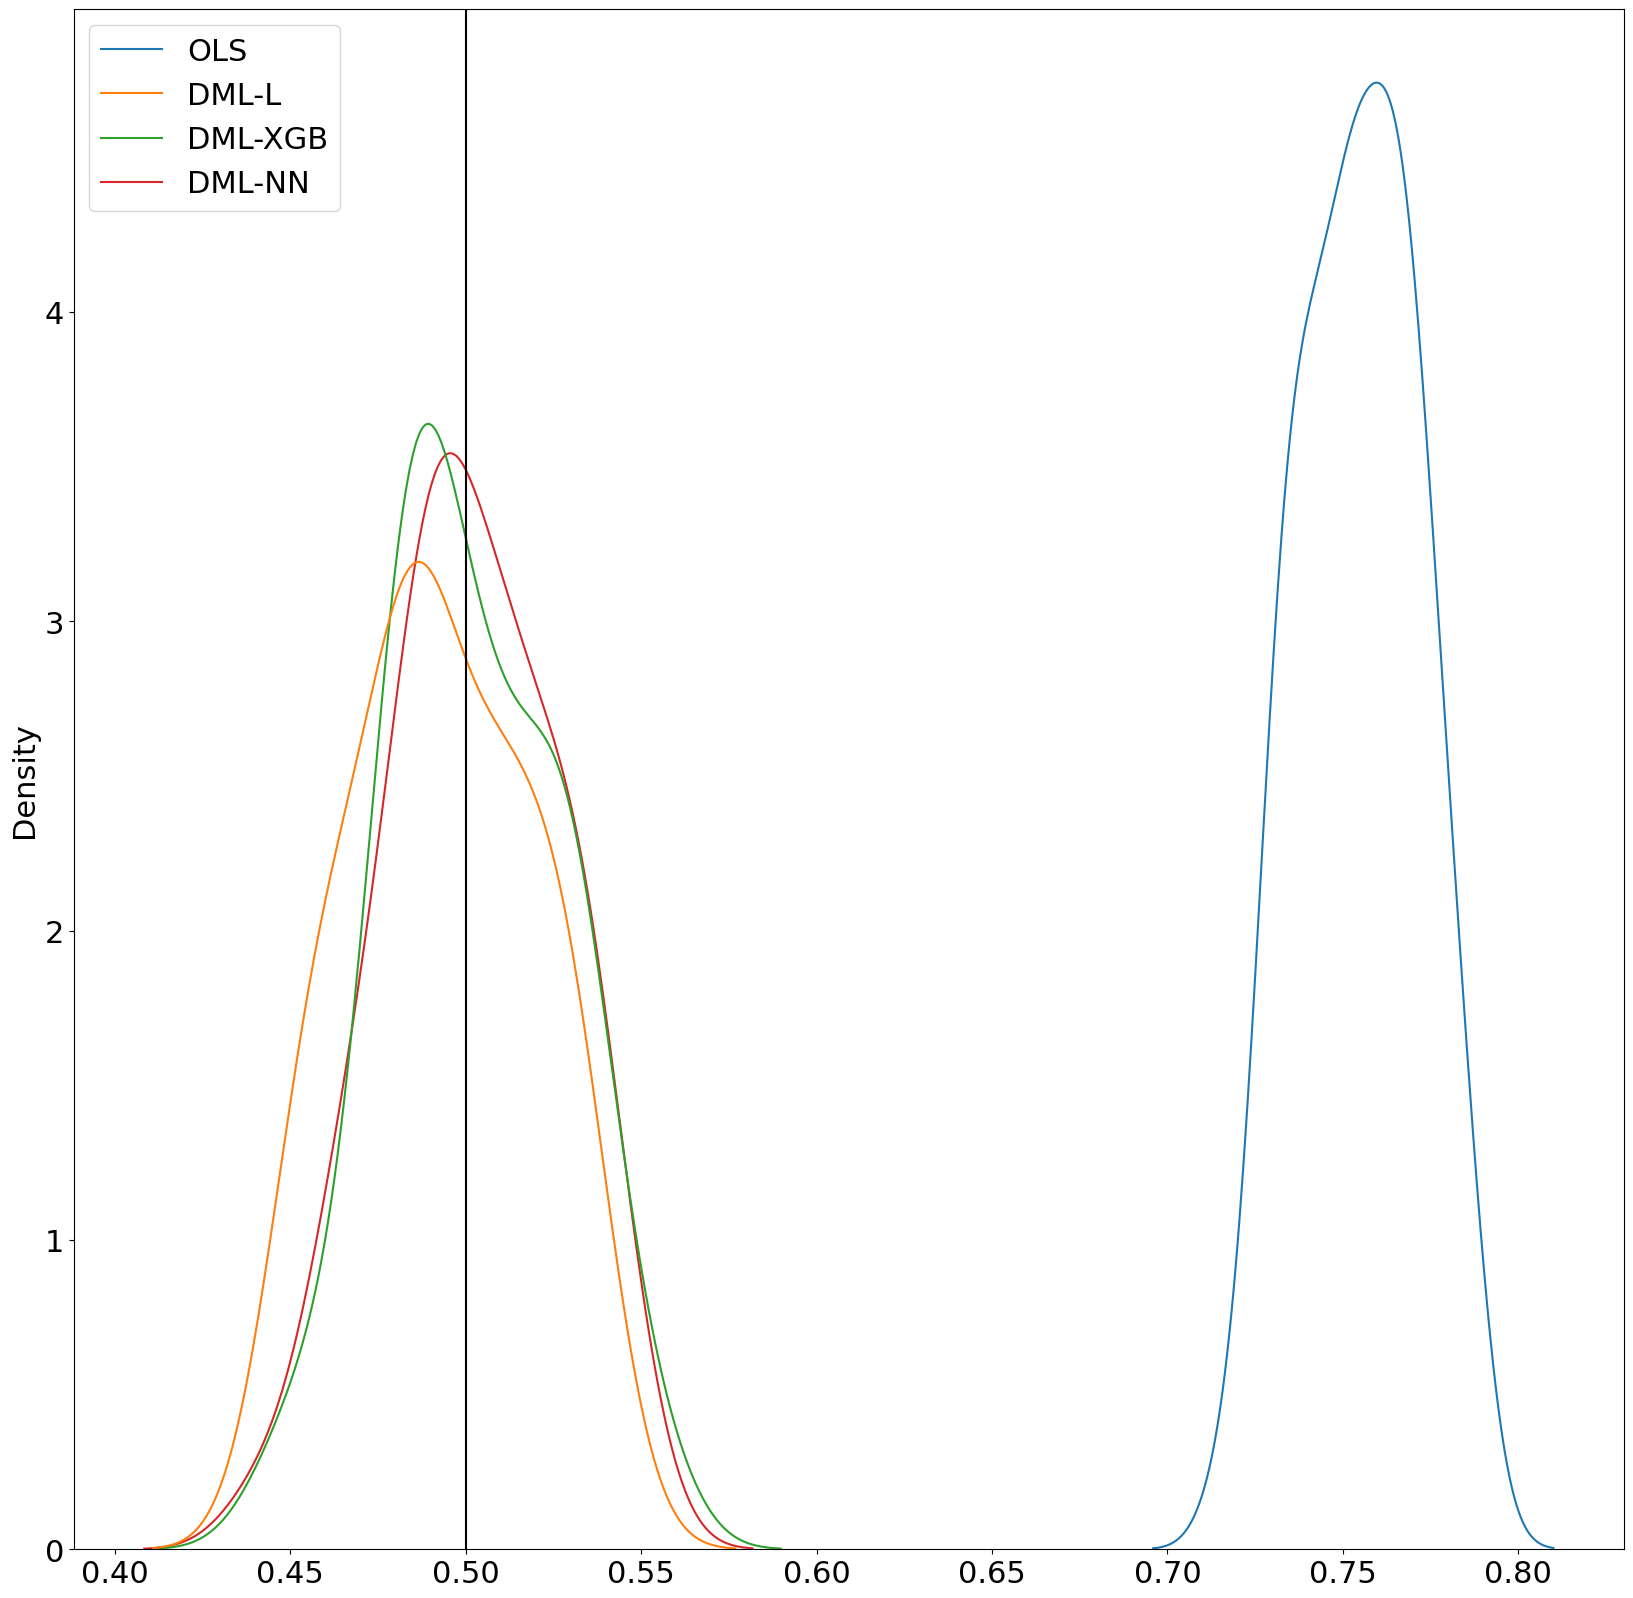

In [22]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt 
df = pd.DataFrame(MC_θ,columns=['OLS','DML-L','DML-XGB','DML-NN'])
plt.figure(figsize=(20,20))
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
sns.kdeplot(df)
plt.axvline(0.5, color='black')
plt.savefig('ex2g.png')